In [2]:
#univariate time series example using lstm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten

In [12]:
def prepare_data(timeseries_data,n_steps):
  X,y=[],[]
  for i in range(len(timeseries_data)):
    #to find the end of the pattern
    end_ix=i+n_features
    #to check if we are beyond the sequence
    if end_ix>len(timeseries_data)-1:
      break
    #gathering input and output parts of the pattern
    seq_x,seq_y=timeseries_data[i:end_ix],timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X),np.array(y)


In [13]:
#definig input sequence
timeseries_data=[110,125,133,146,158,172,187,196,210]
n_steps=3#bascially number of time stamps
X,y=prepare_data(timeseries_data,n_features)

In [14]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [15]:
y

array([146, 158, 172, 187, 196, 210])

In [16]:
X.shape
n_features=1
X=X.reshape((X.shape[0],X.shape[1],n_features))#since lstm takes 3dimensional inputs

In [20]:
#making the lstm model
model=Sequential()
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
#fitting the model
model.fit(X,y,epochs=200,verbose=1)#with verbose =0 it dest show the loading of the epochs but if it is 1 then it shows

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 31603.5098
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 31176.0684
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 30776.3926
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 30423.2324
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 30118.9668
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 29838.9238
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 29548.5391
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 29228.3262
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 28872.1230
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 28478.7598
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 28048.3535
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 27580.7812
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 27075.2949
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 26531.5879
Epoch 15/200
1/1 ━━━━━━━━━━━━━

In [23]:
#predicting for the next 10 data
x_input=np.array([187,196,210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
  if(len(temp_input)>3):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    #print(x_input)
    x_input=x_input.reshape((1,n_steps,n_features))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    lst_output.append(yhat[0][0])
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,n_features))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1
print(lst_output)

[227.77963]
1 day input [196.         210.         227.77963257]
1 day output [[239.30171]]
2 day input [210.         227.77963257 239.30171204]
2 day output [[255.84645]]
3 day input [227.77963 239.30171 255.84645]
3 day output [[273.59277]]
4 day input [239.30171 255.84645 273.59277]
4 day output [[288.39432]]
5 day input [255.84645 273.59277 288.39432]
5 day output [[307.0479]]
6 day input [273.59277 288.39432 307.0479 ]
6 day output [[326.0329]]
7 day input [288.39432 307.0479  326.0329 ]
7 day output [[344.27402]]
8 day input [307.0479  326.0329  344.27402]
8 day output [[365.23273]]
9 day input [326.0329  344.27402 365.23273]
9 day output [[386.55887]]
[227.77963, 239.30171, 255.84645, 273.59277, 288.39432, 307.0479, 326.0329, 344.27402, 365.23273, 386.55887]


In [24]:
#visualizing the output
import matplotlib.pyplot as plt

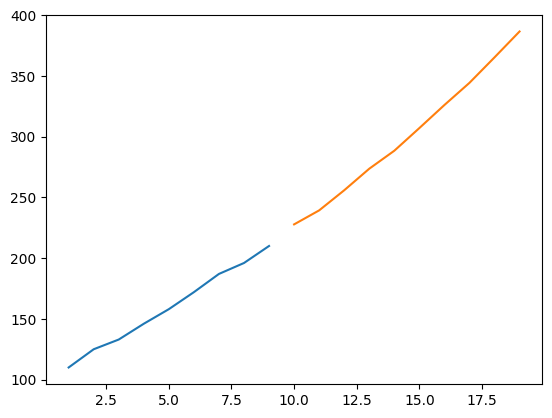

In [27]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)